In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("datosConcatenadossinCI.csv")

In [3]:
df["Cod.Car.Sec"].unique()

array(['INT9MECANI', 'MEC9-OPT  ', 'TIVAS     ', 'MCT9-OPT  ',
       'INT9ELECTR', 'INT9SANEHI', 'INT9TRANSP', 'INT9CONSTR',
       'INT9SDIGYT', 'ECA9-OPT  ', 'INT9G-ECO ', 'INT9-PROYT',
       'CGF-175-09', 'CIV-PLS09 ', 'CGF-PLS09 ', 'IND-PLS09 ',
       'MEC-PLS09 ', 'ELE-PLS09 ', 'MCT-PLS09 ', 'CIV-175-09',
       'ELE-175-09', 'ECA-PLS09 ', 'MEC-175-09', 'IND-175-09',
       'ECA-175-09', 'MCT-175-09', 'IND-PLS13 ', 'MCT-PLS13 ',
       'CIV-PLS13 ', 'ELE-PLS13 ', 'ECA-PLS13 ', 'CGF-PLS13 ',
       'MEC-PLS13 ', 'INT9RNYMA ', 'INT9ORTERR'], dtype=object)

In [4]:
df = df.iloc[:,1:]

In [5]:
# primer semestre
flag_curso = df["Cod.Curso"]==1
flag_carrera_09 = df["Cod.Car.Sec"]=="MCT-PLS09 "
flag_carrera_175_09 = df["Cod.Car.Sec"]=="MCT-175-09 "
flag_carrera_13 = df["Cod.Car.Sec"]=="MCT-PLS13 "
flag_carrera = flag_carrera_09 | flag_carrera_175_09 | flag_carrera_13
df_1 = df[flag_carrera & flag_curso]

In [6]:
df_1

,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,...,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
13931,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,S,...,24,3,0,0,1F-2,0.0,1.0,NaN,NaN,es_1366
13934,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,N,...,6,1,0,0,NaN,0.0,1.0,NaN,NaN,es_1510
13941,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,N,...,6,3,0,0,NaN,0.0,1.0,NaN,NaN,es_1514
13951,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,N,...,18,4,0,0,"1F-1,2F-1",0.0,1.0,NaN,NaN,es_1431
13978,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,S,...,22,3,39,0,2F-2,0.0,1.0,NaN,NaN,es_1539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209096,2021,1,13006,GEOMETRIA DESCRIPTIVA,MCT-PLS13,1,1,2021,1,N,...,18,8,0,0,NaN,0.0,1.0,NaN,NaN,es_4811
209097,2021,1,13006,GEOMETRIA DESCRIPTIVA,MCT-PLS13,1,1,2021,1,N,...,0,0,0,0,NaN,0.0,1.0,NaN,NaN,es_4333
209108,2021,1,13006,GEOMETRIA DESCRIPTIVA,MCT-PLS13,1,1,2021,1,N,...,0,0,0,0,NaN,0.0,1.0,NaN,NaN,es_4654
209124,2021,1,13006,GEOMETRIA DESCRIPTIVA,MCT-PLS13,1,1,2021,1,N,...,10,0,0,0,NaN,0.0,1.0,NaN,NaN,es_4656


In [7]:
#ingreso 2012
flag2011 = df_1["Anho.Firma"]==2011
flag2012 = df_1["Anho"]==2012
flag_duplicados = df_1["id_anony"].duplicated()
in_2012 = df_1[flag2012 & ~flag_duplicados & ~flag2011]
in_2012.id_anony.count()

38

In [8]:
#ingreso 2013
flag2013 = df_1["Anho"]==2013
in_2013 = df_1[flag2013 & ~flag_duplicados & ~flag2011 & ~flag2012]
in_2013.id_anony.count()

50

In [9]:
#ingreso 2014
flag2014 = df_1["Anho"]==2014
in_2014 = df_1[flag2014 & ~flag_duplicados& ~flag2011 & ~flag2012 &~flag2013]
in_2014.id_anony.count()

52

In [10]:
#ingreso 2015
flag2015 = df_1["Anho"]!=2015
in_2015 = df_1[~flag2015 & ~flag_duplicados]
in_2015.id_anony.count()

76

In [11]:
#ingreso 2016
flag2016=df_1["Anho"]!=2016
in_2016=df_1[~flag2016 & ~flag_duplicados]
in_2016.id_anony.count()

45

In [12]:
#ingreso 2017
flag2017=df_1["Anho"]!=2017
in_2017=df_1[~flag2017 & ~flag_duplicados]
in_2017.id_anony.count()

57

In [13]:
#ingreso 2018
flag2018=df_1["Anho"]!=2018
in_2018=df_1[~flag2018 & ~flag_duplicados]
in_2018.id_anony.count()

58

In [14]:
#ingreso 2019-1C
flag2019=df_1["Anho"]!=2019
flag_ciclo=df_1["ciclo"]==1
in_2019_c1=df_1[~flag2019 & ~flag_duplicados & flag_ciclo]
in_2019_c1.id_anony.count()

10

In [15]:
#ingreso 2019-2C
flag_ciclo=df_1["ciclo"]==2
in_2019_c2=df_1[~flag2019 & ~flag_duplicados & flag_ciclo]
in_2019_c2.id_anony.count()

28

In [16]:
#ingreso 2020-1C
flag2020=df_1["Anho"]!=2020
flag_ciclo=df_1["ciclo"]==1
in_2020_c1=df_1[~flag2020 & ~flag_duplicados &flag_ciclo]
in_2020_c1.id_anony.count()

18

In [17]:
#ingreso 2020-2C
flag_ciclo=df_1["ciclo"]==2
in_2020_c2=df_1[~flag2020 & ~flag_duplicados &flag_ciclo]
in_2020_c2.id_anony.count()

0

In [18]:
#ingreso 2021-1C
flag2021=df_1["Anho"]!=2021
flag_ciclo=df_1["ciclo"]==1
in_2021_c1=df_1[~flag2021 & ~flag_duplicados &flag_ciclo]
in_2021_c1.id_anony.count()

16

In [19]:
#ingreso 2021-2C
flag_ciclo=df_1["ciclo"]==2
in_2021_c2=df_1[~flag2021 & ~flag_duplicados &flag_ciclo]
in_2021_c2.id_anony.count()

0

In [20]:
#juntando todos los ingresos en un mismo dataframe
df_in = pd.concat([in_2012,in_2013,in_2014,in_2015,in_2016,in_2017,in_2018,in_2019_c1,in_2019_c2,in_2020_c1,in_2021_c1], axis=0)

In [21]:
df_in

,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,...,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
13931,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,S,...,24,3,0,0,1F-2,0.0,1.0,NaN,NaN,es_1366
13934,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,N,...,6,1,0,0,NaN,0.0,1.0,NaN,NaN,es_1510
13941,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,N,...,6,3,0,0,NaN,0.0,1.0,NaN,NaN,es_1514
13951,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,N,...,18,4,0,0,"1F-1,2F-1",0.0,1.0,NaN,NaN,es_1431
13978,2012,2,9001,CALCULO 1,MCT-PLS09,1,1,2012,2,S,...,22,3,39,0,2F-2,0.0,1.0,NaN,NaN,es_1539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207012,2021,1,13001,FISICA 1,MCT-PLS13,1,1,2021,1,N,...,25,4,0,0,NaN,0.0,1.0,NaN,NaN,es_4769
207046,2021,1,13001,FISICA 1,MCT-PLS13,1,1,2021,1,N,...,11,3,0,0,NaN,0.0,1.0,NaN,NaN,es_4785
207060,2021,1,13001,FISICA 1,MCT-PLS13,1,1,2021,1,N,...,0,2,0,0,NaN,0.0,1.0,NaN,NaN,es_4794
207100,2021,1,13001,FISICA 1,MCT-PLS13,1,1,2021,1,N,...,27,4,0,0,NaN,0.0,1.0,NaN,NaN,es_4811


In [22]:
df_in = df_in.drop(df_in.columns[[0,2,3,4,5,6,8,9]], axis='columns')

In [23]:
df_in

,ciclo,Anho,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
13931,2,2012,2012,9,24,3,0,0,1F-2,0.0,1.0,NaN,NaN,es_1366
13934,2,2012,0,5,6,1,0,0,NaN,0.0,1.0,NaN,NaN,es_1510
13941,2,2012,0,18,6,3,0,0,NaN,0.0,1.0,NaN,NaN,es_1514
13951,2,2012,2012,15,18,4,0,0,"1F-1,2F-1",0.0,1.0,NaN,NaN,es_1431
13978,2,2012,2012,12,22,3,39,0,2F-2,0.0,1.0,NaN,NaN,es_1539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207012,1,2021,2021,13,25,4,0,0,NaN,0.0,1.0,NaN,NaN,es_4769
207046,1,2021,0,10,11,3,0,0,NaN,0.0,1.0,NaN,NaN,es_4785
207060,1,2021,0,8,0,2,0,0,NaN,0.0,1.0,NaN,NaN,es_4794
207100,1,2021,2021,9,27,4,0,0,NaN,0.0,1.0,NaN,NaN,es_4811


In [24]:
df_in = df_in.drop(df_in.columns[[2,3,4,5,6,8,9,10,11,12]], axis='columns')

In [25]:
df_in = df_in.drop(df_in.columns[[2]], axis='columns')
df_in

,ciclo,Anho,id_anony
13931,2,2012,es_1366
13934,2,2012,es_1510
13941,2,2012,es_1514
13951,2,2012,es_1431
13978,2,2012,es_1539
...,...,...,...
207012,1,2021,es_4769
207046,1,2021,es_4785
207060,1,2021,es_4794
207100,1,2021,es_4811


In [26]:
# cuarto semestre
flag_curso = df["Cod.Curso"]==4
flag_carrera_09 = df["Cod.Car.Sec"]=="MCT-PLS09 "
flag_carrera_175_09 = df["Cod.Car.Sec"]=="MCT-175-09 "
flag_carrera_13 = df["Cod.Car.Sec"]=="MCT-PLS13 "
flag_carrera = flag_carrera_09 | flag_carrera_175_09 | flag_carrera_13
df_4 = df[flag_carrera & flag_curso]

In [27]:
flag_aprobado = df_4["Aprobado"]=="S"
flag_materias=(df_4["Asignatura"]=='DINAMICA') | (df_4["Asignatura"]=='FISICA DE SEMICONDUCTORES') |(df_4["Asignatura"]=='METODOS NUMERICOS') |(df_4["Asignatura"]=='PROGRAMACION ORIENTADA A OBJETOS') |(df_4["Asignatura"]=='TEORIA DE CIRCUITOS')
df_pasaron_4=df_4[flag_materias & flag_aprobado]

In [28]:
df_pasaron_4

,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,...,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
736,2012,1,5017,DINAMICA,MCT-PLS09,4,1,2012,1,S,...,24,0,0,0,1F-4,0.0,1.0,NaN,NaN,es_494
773,2012,1,5017,DINAMICA,MCT-PLS09,4,1,2012,1,S,...,26,0,0,0,1F-5,0.0,1.0,NaN,NaN,es_511
797,2012,1,5017,DINAMICA,MCT-PLS09,4,1,2012,1,S,...,21,0,36,0,2F-2,0.0,1.0,NaN,NaN,es_524
836,2012,1,5017,DINAMICA,MCT-PLS09,4,1,2012,1,S,...,28,0,0,0,1F-5,0.0,1.0,NaN,NaN,es_545
884,2012,1,5017,DINAMICA,MCT-PLS09,4,1,2012,1,S,...,34,0,0,0,1F-5,0.0,1.0,NaN,NaN,es_569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204403,2020,1,13705,PROGRAMACION ORIENTADA A OBJETOS,MCT-PLS13,4,1,2020,1,S,...,9,7,0,0,1F-5,7.0,1.0,29.0,48.0,es_4133
204404,2020,1,13705,PROGRAMACION ORIENTADA A OBJETOS,MCT-PLS13,4,1,2020,1,S,...,7,7,0,0,3F-2,0.0,1.0,21.0,35.0,es_3741
204405,2020,1,13705,PROGRAMACION ORIENTADA A OBJETOS,MCT-PLS13,4,1,2020,1,S,...,0,7,0,0,1F-5,9.0,1.0,28.0,47.0,es_3743
204406,2020,1,13705,PROGRAMACION ORIENTADA A OBJETOS,MCT-PLS13,4,1,2020,1,S,...,10,9,0,0,1F-5,9.0,1.0,33.0,55.0,es_3329


In [29]:
df_pasaron_4 = df_pasaron_4.drop(df_pasaron_4.columns[[0,2,4,5,6,8,9]], axis='columns')

In [30]:
df_pasaron_4= df_pasaron_4.drop(df_pasaron_4.columns[[3,4,5,6,7,8,9,10,11,12,13]], axis='columns')
df_pasaron_4

,ciclo,Asignatura,Anho,id_anony
736,1,DINAMICA,2012,es_494
773,1,DINAMICA,2012,es_511
797,1,DINAMICA,2012,es_524
836,1,DINAMICA,2012,es_545
884,1,DINAMICA,2012,es_569
...,...,...,...,...
204403,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_4133
204404,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_3741
204405,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_3743
204406,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_3329


In [31]:
flag_dinamica = df_pasaron_4["Asignatura"]=='DINAMICA'
df_pas_dinamica = df_pasaron_4[flag_dinamica]
df_pas_dinamica

,ciclo,Asignatura,Anho,id_anony
736,1,DINAMICA,2012,es_494
773,1,DINAMICA,2012,es_511
797,1,DINAMICA,2012,es_524
836,1,DINAMICA,2012,es_545
884,1,DINAMICA,2012,es_569
...,...,...,...,...
199494,1,DINAMICA,2020,es_4037
199497,1,DINAMICA,2020,es_3236
199504,1,DINAMICA,2020,es_4053
199516,1,DINAMICA,2020,es_3788


In [32]:
flag_fs = df_pasaron_4["Asignatura"]=='FISICA DE SEMICONDUCTORES'
df_pas_fs = df_pasaron_4[flag_fs]
df_pas_fs

,ciclo,Asignatura,Anho,id_anony
3710,1,FISICA DE SEMICONDUCTORES,2012,es_494
3715,1,FISICA DE SEMICONDUCTORES,2012,es_507
3717,1,FISICA DE SEMICONDUCTORES,2012,es_511
3720,1,FISICA DE SEMICONDUCTORES,2012,es_524
3723,1,FISICA DE SEMICONDUCTORES,2012,es_545
...,...,...,...,...
204273,1,FISICA DE SEMICONDUCTORES,2020,es_4108
204274,1,FISICA DE SEMICONDUCTORES,2020,es_4114
204276,1,FISICA DE SEMICONDUCTORES,2020,es_4133
204278,1,FISICA DE SEMICONDUCTORES,2020,es_3740


In [33]:
flag_mn = df_pasaron_4["Asignatura"]=='METODOS NUMERICOS'
df_pas_mn = df_pasaron_4[flag_mn]
df_pas_mn

,ciclo,Asignatura,Anho,id_anony
4371,1,METODOS NUMERICOS,2012,es_495
4376,1,METODOS NUMERICOS,2012,es_507
4377,1,METODOS NUMERICOS,2012,es_511
4381,1,METODOS NUMERICOS,2012,es_524
4385,1,METODOS NUMERICOS,2012,es_545
...,...,...,...,...
204311,1,METODOS NUMERICOS,2020,es_4053
204312,1,METODOS NUMERICOS,2020,es_4066
204313,1,METODOS NUMERICOS,2020,es_3259
204314,1,METODOS NUMERICOS,2020,es_4097


In [34]:
flag_poo = df_pasaron_4["Asignatura"]=='PROGRAMACION ORIENTADA A OBJETOS'
df_pas_poo = df_pasaron_4[flag_poo]
df_pas_poo

,ciclo,Asignatura,Anho,id_anony
4710,1,PROGRAMACION ORIENTADA A OBJETOS,2012,es_1005
4711,1,PROGRAMACION ORIENTADA A OBJETOS,2012,es_1004
4712,1,PROGRAMACION ORIENTADA A OBJETOS,2012,es_978
4713,1,PROGRAMACION ORIENTADA A OBJETOS,2012,es_1006
4714,1,PROGRAMACION ORIENTADA A OBJETOS,2012,es_185
...,...,...,...,...
204403,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_4133
204404,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_3741
204405,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_3743
204406,1,PROGRAMACION ORIENTADA A OBJETOS,2020,es_3329


In [35]:
flag_tc = df_pasaron_4["Asignatura"]=='TEORIA DE CIRCUITOS'
df_pas_tc = df_pasaron_4[flag_tc]
df_pas_tc

,ciclo,Asignatura,Anho,id_anony
4907,1,TEORIA DE CIRCUITOS,2012,es_494
4908,1,TEORIA DE CIRCUITOS,2012,es_495
4910,1,TEORIA DE CIRCUITOS,2012,es_511
4912,1,TEORIA DE CIRCUITOS,2012,es_524
4913,1,TEORIA DE CIRCUITOS,2012,es_545
...,...,...,...,...
204348,1,TEORIA DE CIRCUITOS,2020,es_4097
204349,1,TEORIA DE CIRCUITOS,2020,es_4114
204351,1,TEORIA DE CIRCUITOS,2020,es_4133
204352,1,TEORIA DE CIRCUITOS,2020,es_3740


In [36]:
df_merge_4 = pd.merge(left=df_pas_dinamica, right=df_pas_fs, left_on='id_anony', right_on='id_anony')

In [37]:
df_merge_4 = pd.merge(left=df_merge_4, right=df_pas_mn, left_on='id_anony', right_on='id_anony')

In [38]:
df_merge_4 = pd.merge(left=df_merge_4, right= df_pas_poo, left_on='id_anony', right_on='id_anony')

In [39]:
df_merge_4 = pd.merge(left=df_merge_4, right= df_pas_tc, left_on='id_anony', right_on='id_anony')

In [40]:
df_merge_4

,ciclo_x,Asignatura_x,Anho_x,id_anony,ciclo_y,Asignatura_y,Anho_y,ciclo_x,Asignatura_x,Anho_x,ciclo_y,Asignatura_y,Anho_y,ciclo,Asignatura,Anho
0,1,DINAMICA,2012,es_511,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2012
1,1,DINAMICA,2012,es_524,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2012
2,1,DINAMICA,2012,es_545,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2012
3,1,DINAMICA,2012,es_569,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2013,1,TEORIA DE CIRCUITOS,2012
4,1,DINAMICA,2012,es_668,1,FISICA DE SEMICONDUCTORES,2013,1,METODOS NUMERICOS,2013,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,DINAMICA,2020,es_4114,1,FISICA DE SEMICONDUCTORES,2020,1,METODOS NUMERICOS,2020,1,PROGRAMACION ORIENTADA A OBJETOS,2020,1,TEORIA DE CIRCUITOS,2020
446,1,DINAMICA,2020,es_4114,1,FISICA DE SEMICONDUCTORES,2020,1,METODOS NUMERICOS,2020,1,PROGRAMACION ORIENTADA A OBJETOS,2020,1,TEORIA DE CIRCUITOS,2020
447,1,DINAMICA,2020,es_4114,1,FISICA DE SEMICONDUCTORES,2020,1,METODOS NUMERICOS,2020,1,PROGRAMACION ORIENTADA A OBJETOS,2020,1,TEORIA DE CIRCUITOS,2020
448,1,DINAMICA,2020,es_4114,1,FISICA DE SEMICONDUCTORES,2020,1,METODOS NUMERICOS,2020,1,PROGRAMACION ORIENTADA A OBJETOS,2020,1,TEORIA DE CIRCUITOS,2020


In [41]:
df_merge_4.id_anony.value_counts()

es_3877    32
es_4114    32
es_3859    32
es_4037    32
es_3804    32
           ..
es_2441     1
es_2424     1
es_2774     1
es_2631     1
es_2870     1
Name: id_anony, Length: 162, dtype: int64

In [42]:
df_merge_4=df_merge_4.drop_duplicates()

In [43]:
df_merge_4

,ciclo_x,Asignatura_x,Anho_x,id_anony,ciclo_y,Asignatura_y,Anho_y,ciclo_x,Asignatura_x,Anho_x,ciclo_y,Asignatura_y,Anho_y,ciclo,Asignatura,Anho
0,1,DINAMICA,2012,es_511,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2012
1,1,DINAMICA,2012,es_524,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2012
2,1,DINAMICA,2012,es_545,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2012
3,1,DINAMICA,2012,es_569,1,FISICA DE SEMICONDUCTORES,2012,1,METODOS NUMERICOS,2012,1,PROGRAMACION ORIENTADA A OBJETOS,2013,1,TEORIA DE CIRCUITOS,2012
4,1,DINAMICA,2012,es_668,1,FISICA DE SEMICONDUCTORES,2013,1,METODOS NUMERICOS,2013,1,PROGRAMACION ORIENTADA A OBJETOS,2012,1,TEORIA DE CIRCUITOS,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,DINAMICA,2020,es_3998,1,FISICA DE SEMICONDUCTORES,2020,1,METODOS NUMERICOS,2020,1,PROGRAMACION ORIENTADA A OBJETOS,2020,1,TEORIA DE CIRCUITOS,2020
350,1,DINAMICA,2020,es_4037,1,FISICA DE SEMICONDUCTORES,2020,1,METODOS NUMERICOS,2020,1,PROGRAMACION ORIENTADA A OBJETOS,2020,1,TEORIA DE CIRCUITOS,2020
382,1,DINAMICA,2020,es_4053,1,FISICA DE SEMICONDUCTORES,2020,1,METODOS NUMERICOS,2020,1,PROGRAMACION ORIENTADA A OBJETOS,2020,1,TEORIA DE CIRCUITOS,2020
414,1,DINAMICA,2020,es_3788,1,FISICA DE SEMICONDUCTORES,2019,1,METODOS NUMERICOS,2019,1,PROGRAMACION ORIENTADA A OBJETOS,2018,1,TEORIA DE CIRCUITOS,2020


In [44]:
df_merge_4= df_merge_4.drop(df_merge_4.columns[[0,1,4,5,7,8,10,11,13]], axis='columns')

In [45]:
df_merge_4= df_merge_4.drop(df_merge_4.columns[[5]], axis='columns')

In [46]:
df_merge_4

,Anho_x,id_anony,Anho_y,Anho_x,Anho_y,Anho
0,2012,es_511,2012,2012,2012,2012
1,2012,es_524,2012,2012,2012,2012
2,2012,es_545,2012,2012,2012,2012
3,2012,es_569,2012,2012,2013,2012
4,2012,es_668,2013,2013,2012,2013
...,...,...,...,...,...,...
318,2020,es_3998,2020,2020,2020,2020
350,2020,es_4037,2020,2020,2020,2020
382,2020,es_4053,2020,2020,2020,2020
414,2020,es_3788,2019,2019,2018,2020


In [47]:
data_final=df_merge_4.max(axis=1)
data_final = data_final.to_frame()
data_final = data_final.rename(columns={0:'out'})

In [48]:
data_final

,out
0,2012
1,2012
2,2012
3,2013
4,2013
...,...
318,2020
350,2020
382,2020
414,2020


In [49]:
df_merge_4 = pd.concat([df_merge_4,data_final],axis=1)

In [50]:
df_merge_4 = df_merge_4.drop(df_merge_4.columns[[0,2,3,4,5]], axis='columns')

In [51]:
df_merge_4

,id_anony,out
0,es_511,2012
1,es_524,2012
2,es_545,2012
3,es_569,2013
4,es_668,2013
...,...,...
318,es_3998,2020
350,es_4037,2020
382,es_4053,2020
414,es_3788,2020


In [52]:
final_df = pd.merge(left=df_in, right=df_merge_4, left_on='id_anony', right_on='id_anony')
final_df = final_df.drop(final_df.columns[[0]], axis='columns')

In [53]:
# tabla de alumnos que iniciaron y terminaron cursos basicos 
#sin contar a  proba,dibujo y quimica cuyas correlativas estan en CP
final_df

,Anho,id_anony,out
0,2012,es_1366,2016
1,2012,es_1514,2019
2,2012,es_1431,2018
3,2012,es_1629,2017
4,2012,es_1400,2019
...,...,...,...
113,2018,es_3867,2020
114,2018,es_3907,2020
115,2018,es_4037,2020
116,2018,es_4053,2020


In [54]:
final_df.shape

(118, 3)

In [55]:
flag_carrera_09 = df["Cod.Car.Sec"]=="MCT-PLS09 "
flag_carrera_175_09 = df["Cod.Car.Sec"]=="MCT-175-09 "
flag_carrera_13 = df["Cod.Car.Sec"]=="MCT-PLS13 "
flag_carrera = flag_carrera_09 | flag_carrera_175_09 | flag_carrera_13
df_sin_correlativas = df[flag_carrera]

In [56]:
flag_aprobado = df_sin_correlativas["Aprobado"]=="S"
flag_dibujo = df_sin_correlativas["Asignatura"]=='DIBUJO TECNICO'
df_dibujo = df_sin_correlativas[flag_aprobado & flag_dibujo]
df_dibujo = df_dibujo.drop_duplicates()
df_dibujo = df_dibujo.drop(df_dibujo.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20]], axis='columns')

flag_quimica = df_sin_correlativas["Asignatura"]=='QUIMICA GENERAL'
df_quimica = df_sin_correlativas[flag_aprobado & flag_quimica]
df_quimica = df_quimica.drop_duplicates()
df_quimica = df_quimica.drop(df_quimica.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20]], axis='columns')

flag_proba = df_sin_correlativas["Asignatura"]=='PROBABILIDAD Y ESTADISTICA '
flag_proba2 = df_sin_correlativas["Asignatura"]=='PROBABILIDAD Y ESTADISTICA'
flag_pye = flag_proba | flag_proba2
df_proba = df_sin_correlativas[flag_pye & flag_aprobado]
df_proba = df_proba.drop_duplicates()
df_proba = df_proba.drop(df_proba.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20]], axis='columns')

In [57]:
df_DQP = pd.merge(left=df_dibujo, right=df_quimica, left_on='id_anony', right_on='id_anony')

In [58]:
df_DQP = pd.merge(left=df_DQP, right=df_proba, left_on='id_anony', right_on='id_anony')

In [59]:
data_final_2 = df_DQP.max(axis=1)
data_final_2 = data_final_2.to_frame()
data_final_2 = data_final_2.rename(columns={0:'out_2'})

In [60]:
df_DQP = df_DQP.drop(df_DQP.columns[[0,2,3]], axis='columns')

In [61]:
df_DQP = pd.concat([df_DQP,data_final_2],axis=1)

In [62]:
dataset_final = pd.merge(left=final_df, right=df_DQP, left_on='id_anony', right_on='id_anony')

In [63]:
data_final_3 = dataset_final.max(axis=1)
data_final_3 = data_final_3.to_frame()
data_final_3 = data_final_3.rename(columns={0:'Anho_out'})

In [64]:
dataset_final = dataset_final.drop(dataset_final.columns[[2,3]], axis='columns')

In [65]:
dataset_final = pd.concat([dataset_final,data_final_3],axis=1)

In [66]:
# tabla de alumnos que iniciaron y terminaron cursos basicos 
#teniendo en cuenta a proba, dibujo y quimica cuyas correlativas estan en CP
dataset_final

,Anho,id_anony,Anho_out
0,2012,es_1514,2019
1,2012,es_1431,2018
2,2012,es_1400,2019
3,2012,es_1726,2018
4,2012,es_1728,2018
...,...,...,...
105,2018,es_3867,2020
106,2018,es_3907,2020
107,2018,es_4037,2020
108,2018,es_4053,2020


In [68]:
dataset_final.to_csv("resultados.csv")

In [69]:
from sklearn.metrics import classification_report
%matplotlib inline

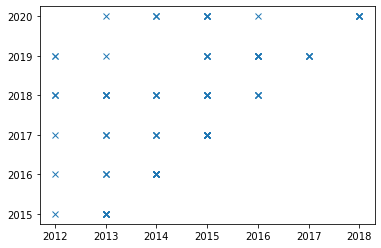

In [70]:
# Seleccionar dos variables
X = dataset_final.iloc[:,0].values
Y = dataset_final.iloc[:,2].values
plt.plot(X, Y, 'x')

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X=X[:,np.newaxis]
Y=Y[:,np.newaxis]

In [73]:
print(X.shape,Y.shape)

(110, 1) (110, 1)


In [74]:
# separar en conjuntos de entrenamiento y prueba, el conjunto de prueba corresponde al 45% de los datos
data_train, data_test, label_train, label_test = train_test_split( X, Y, test_size=0.45, random_state=42)

In [75]:
data_train.shape, label_train.shape

((60, 1), (60, 1))

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [77]:
# Aplicar la regresion lineal entre las variables, con la libreria Sklearn.(Imprimir en pantalla los coeficientes obteniedos)
lin_reg = LinearRegression()
lin_reg.fit(data_train, label_train)
print("Variable independiente:",lin_reg.intercept_,", Coeficiente:", lin_reg.coef_)

Variable independiente: [905.60293492] , Coeficiente: [[0.55210549]]


In [78]:
# Predicciones
predictions = lin_reg.predict(data_test)

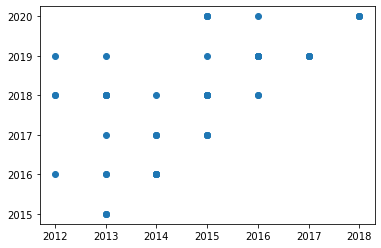

In [79]:
plt.scatter(data_train,label_train)

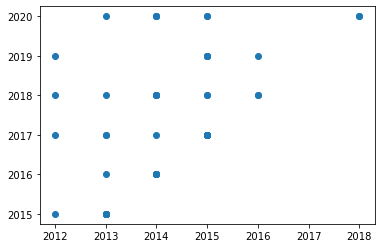

In [80]:
plt.scatter(data_test,label_test)

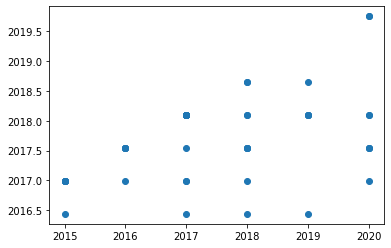

In [81]:
plt.scatter(label_test,predictions)

In [82]:
print('MAE:', metrics.mean_absolute_error(label_test, predictions))
print('MSE:', metrics.mean_squared_error(label_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(label_test, predictions)))

MAE: 1.203470863462362
MSE: 1.9960018624255187
RMSE: 1.4127993001221082


In [84]:
resultados = pd.concat([pd.DataFrame(data_test),pd.DataFrame(label_test)],axis=1)
resultados = pd.concat([resultados,pd.DataFrame(predictions)],axis=1)
resultados

,0,0,0
0,2015,2017,2018.095491
1,2013,2017,2016.991280
2,2012,2018,2016.439175
3,2015,2017,2018.095491
4,2015,2017,2018.095491
5,2015,2018,2018.095491
6,2013,2017,2016.991280
7,2014,2020,2017.543386
8,2016,2019,2018.647597
9,2013,2020,2016.991280


In [99]:
random=[2015,2017,2019,2020,2022,2023,2024]
arr = np.array(random)
arr=arr[:,np.newaxis]

In [100]:
predictions_r = lin_reg.predict(arr)

In [101]:
predictions_r

array([[2018.09549128],
       [2019.19970225],
       [2020.30391323],
       [2020.85601872],
       [2021.96022969],
       [2022.51233518],
       [2023.06444066]])